In [1]:
!pip install opencv-python opencv-contrib-python matplotlib numpy


In [9]:
from google.colab import files

uploaded = files.upload()


Saving left_image.jpg to left_image (1).jpg
Saving right_image.jpg to right_image (1).jpg


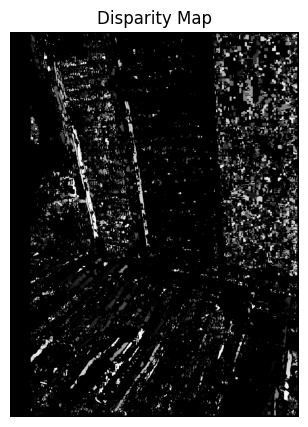

✅ Extracted 3D points: (270432, 3)


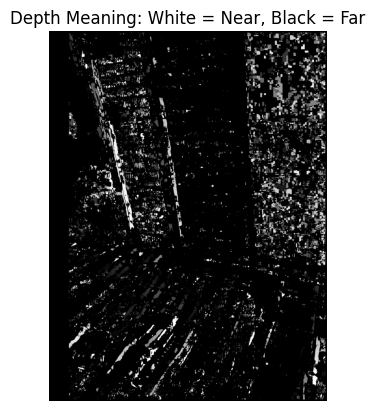

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load stereo images (with correct filenames)
imgL = cv2.imread('left_image.jpg', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('right_image.jpg', cv2.IMREAD_GRAYSCALE)

if imgL is None or imgR is None:
    raise Exception("❌ Make sure 'left_image.jpg' and 'right_image.jpg' are uploaded!")

# Create a StereoBM or StereoSGBM object
stereo = cv2.StereoBM_create(numDisparities=16*5, blockSize=15)

# Compute disparity map
disparity = stereo.compute(imgL, imgR)

# Normalize disparity for visualization
disparity_normalized = cv2.normalize(
    disparity, None, alpha=0, beta=255,
    norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U
)

# Display disparity map
plt.figure(figsize=(10, 5))
plt.imshow(disparity_normalized, cmap='gray')
plt.title('Disparity Map')
plt.axis('off')
plt.show()

# Reprojection to 3D (dummy calibration matrix)
focal_length = 0.8 * imgL.shape[1]
Q = np.float32([
    [1, 0, 0, -imgL.shape[1] / 2],
    [0, -1, 0, imgL.shape[0] / 2],
    [0, 0, 0, focal_length],
    [0, 0, 1, 0]
])

points_3D = cv2.reprojectImageTo3D(disparity, Q)
mask = disparity > disparity.min()
output_points = points_3D[mask]

print(f"✅ Extracted 3D points: {output_points.shape}")

# Show depth meaning
plt.imshow(disparity_normalized, cmap='gray')
plt.title('Depth Meaning: White = Near, Black = Far')
plt.axis('off')
plt.show()


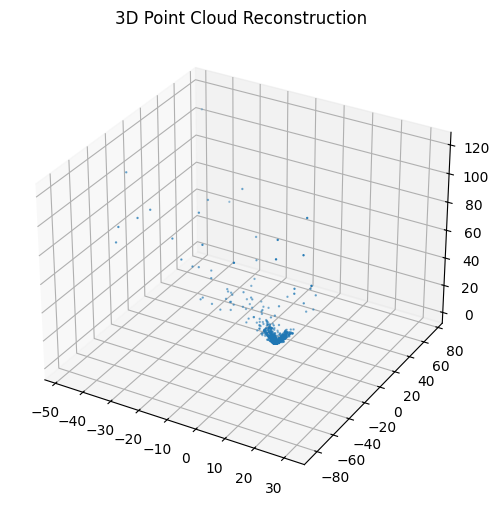

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Sample a few points (for speed)
sample = output_points[::100]
ax.scatter(sample[:, 0], sample[:, 1], sample[:, 2], s=0.5)
ax.set_title("3D Point Cloud Reconstruction")
plt.show()


In [5]:
def compute_disparity(imgL, imgR, method="BM"):
    if method == "BM":
        stereo = cv2.StereoBM_create(numDisparities=16*5, blockSize=15)
    else:
        stereo = cv2.StereoSGBM_create(
            minDisparity=0,
            numDisparities=16*5,
            blockSize=15,
            P1=8 * 3 * 15 ** 2,
            P2=32 * 3 * 15 ** 2,
            disp12MaxDiff=1,
            uniquenessRatio=15,
            speckleWindowSize=50,
            speckleRange=2
        )
    disparity = stereo.compute(imgL, imgR)
    return cv2.normalize(disparity, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)


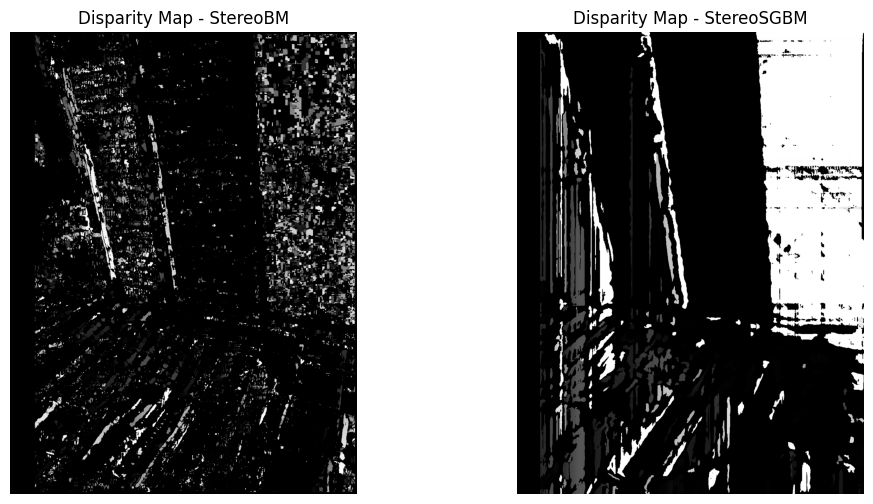

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load stereo images
imgL = cv2.imread('left_image.jpg', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('right_image.jpg', cv2.IMREAD_GRAYSCALE)

if imgL is None or imgR is None:
    raise Exception("❌ Please upload 'left_image.jpg' and 'right_image.jpg' first!")

# ----- StereoBM -----
stereo_bm = cv2.StereoBM_create(numDisparities=16*5, blockSize=15)
disparity_bm = stereo_bm.compute(imgL, imgR)
disparity_bm = cv2.normalize(disparity_bm, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# ----- StereoSGBM -----
stereo_sgbm = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=16*5,
    blockSize=15,
    P1=8 * 3 * 15 ** 2,
    P2=32 * 3 * 15 ** 2,
    disp12MaxDiff=1,
    uniquenessRatio=10,
    speckleWindowSize=100,
    speckleRange=32,
    preFilterCap=63
)
disparity_sgbm = stereo_sgbm.compute(imgL, imgR)
disparity_sgbm = cv2.normalize(disparity_sgbm, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# ----- Visualization -----
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(disparity_bm, cmap='gray')
plt.title('Disparity Map - StereoBM')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(disparity_sgbm, cmap='gray')
plt.title('Disparity Map - StereoSGBM')
plt.axis('off')

plt.show()


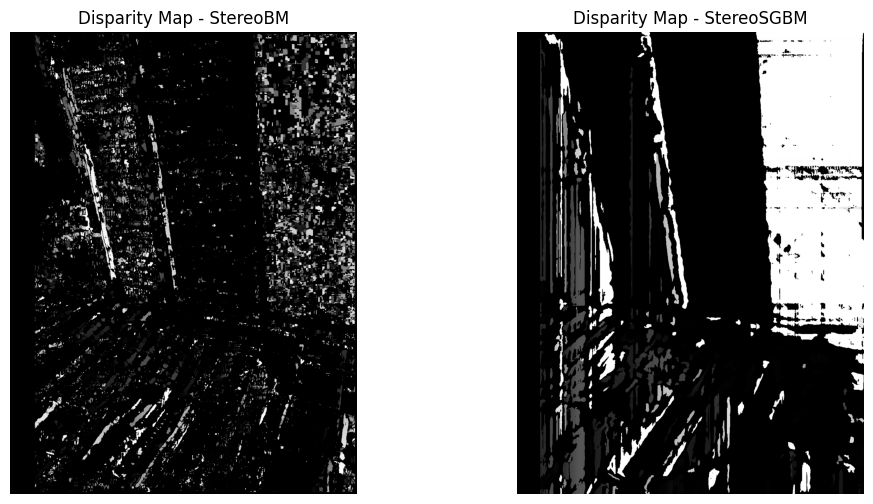

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load stereo images
imgL = cv2.imread('left_image.jpg', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('right_image.jpg', cv2.IMREAD_GRAYSCALE)

# Validate
if imgL is None or imgR is None:
    raise Exception("Please upload both images correctly!")

# StereoBM
stereo_bm = cv2.StereoBM_create(numDisparities=16*5, blockSize=15)
disparity_bm = stereo_bm.compute(imgL, imgR)
disparity_bm = cv2.normalize(disparity_bm, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# StereoSGBM
stereo_sgbm = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=16*5,
    blockSize=15,
    P1=8 * 3 * 15 ** 2,
    P2=32 * 3 * 15 ** 2,
    disp12MaxDiff=1,
    uniquenessRatio=10,
    speckleWindowSize=100,
    speckleRange=32,
    preFilterCap=63
)
disparity_sgbm = stereo_sgbm.compute(imgL, imgR)
disparity_sgbm = cv2.normalize(disparity_sgbm, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Visualize both
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(disparity_bm, cmap='gray')
plt.title('Disparity Map - StereoBM')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(disparity_sgbm, cmap='gray')
plt.title('Disparity Map - StereoSGBM')
plt.axis('off')

plt.show()


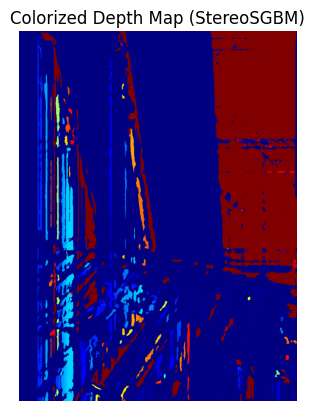

In [18]:
disp_color = cv2.applyColorMap(disparity_sgbm, cv2.COLORMAP_JET)
plt.imshow(cv2.cvtColor(disp_color, cv2.COLOR_BGR2RGB))
plt.title('Colorized Depth Map (StereoSGBM)')
plt.axis('off')
plt.show()


In [19]:
focal_length = 0.8 * imgL.shape[1]
Q = np.float32([
    [1, 0, 0, -imgL.shape[1]/2],
    [0, -1, 0, imgL.shape[0]/2],
    [0, 0, 0, focal_length],
    [0, 0, 1, 0]
])

points_3D = cv2.reprojectImageTo3D(disparity_sgbm, Q)
mask = disparity_sgbm > disparity_sgbm.min()
output_points = points_3D[mask]

print("✅ Extracted 3D points:", output_points.shape)


✅ Extracted 3D points: (565056, 3)
